<a href="https://colab.research.google.com/github/gorbo96/Simulacion/blob/main/Practica2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as pltimg
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
import seaborn as sns

In [2]:
fifa=pd.read_csv("fifa_datos.csv",sep=",",encoding="utf-8")
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
fifa=fifa.drop(['Unnamed: 0','ID','Name','Photo','Flag','Club Logo','Jersey Number','Real Face'],axis=1)

In [4]:
fifa

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,Right,1.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,Right,1.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,16,England,47,67,Cambridge United,€60K,€1K,1189,Right,1.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,Right,1.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [5]:
ceros=['International Reputation','Weak Foot','Skill Moves','LS', 'ST','RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM','CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing','Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing','BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots','Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties','Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes','Release Clause']
nones=['Club','Preferred Foot','Work Rate','Body Type','Position','Loaned From']
for columna in ceros:
  fifa[columna]=fifa[columna].fillna(0)
for columna in nones:
  fifa[columna]=fifa[columna].fillna('None')


In [6]:
etiquetas=['Nationality','Club','Preferred Foot','Work Rate','Body Type','Position']
le=LabelEncoder()
fifa_label=fifa[etiquetas].apply(le.fit_transform)
fifa_label

,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position
0,6,212,0,8,4,22
1,123,326,2,1,1,27
2,20,436,2,2,5,14
3,139,375,2,8,3,5
4,13,374,2,0,7,20
...,...,...,...,...,...,...
18202,46,165,2,8,3,4
18203,144,588,2,8,7,27
18204,46,122,2,8,7,27
18205,46,587,2,8,3,25


In [7]:
for columna in fifa_label.columns:
  fifa[columna]=fifa_label[columna]
fifa

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,6,94,94,212,€110.5M,€565K,2202,0,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,123,94,94,326,€77M,€405K,2228,2,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,20,92,93,436,€118.5M,€290K,2143,2,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,139,91,93,375,€72M,€260K,1471,2,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,27,13,91,92,374,€102M,€355K,2281,2,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,46,47,65,165,€60K,€1K,1307,2,1.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,19,144,47,63,588,€60K,€1K,1098,2,1.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,16,46,47,67,122,€60K,€1K,1189,2,1.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,17,46,47,66,587,€60K,€1K,1228,2,1.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [8]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  int64  
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      18207 non-null  int64  
 5   Value                     18207 non-null  object 
 6   Wage                      18207 non-null  object 
 7   Special                   18207 non-null  int64  
 8   Preferred Foot            18207 non-null  int64  
 9   International Reputation  18207 non-null  float64
 10  Weak Foot                 18207 non-null  float64
 11  Skill Moves               18207 non-null  float64
 12  Work Rate                 18207 non-null  int64  
 13  Body Type                 18207 non-null  int64  
 14  Positi

In [9]:
fifa.describe(include=['int64'])

,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,Work Rate,Body Type,Position
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,76.136156,66.238699,71.307299,325.974186,1597.809908,1.534794,5.807931,5.774318,11.726204
std,4.669943,47.834069,6.908930,6.136496,187.502477,272.586016,0.843444,2.862414,2.170322,9.221713
min,16.000000,0.000000,46.000000,48.000000,0.000000,731.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,35.000000,62.000000,67.000000,164.000000,1457.000000,2.000000,2.000000,3.000000,4.000000
50%,25.000000,59.000000,66.000000,71.000000,329.000000,1635.000000,2.000000,8.000000,7.000000,8.000000
75%,28.000000,123.000000,71.000000,75.000000,485.000000,1787.000000,2.000000,8.000000,7.000000,20.000000
max,45.000000,163.000000,94.000000,95.000000,651.000000,2346.000000,2.000000,9.000000,10.000000,27.000000


In [10]:
fifa.describe(include=['float64'])

,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,1.110287,2.939529,2.355083,49.603065,45.430823,52.160268,58.531993,42.795903,55.225023,47.046466,...,48.420607,58.493656,47.156973,47.572088,45.541056,16.572417,16.348382,16.189268,16.345691,16.666831
std,0.397630,0.676679,0.764813,18.516769,19.639462,17.562941,14.985392,17.807529,19.097679,18.529559,...,15.879699,11.810375,20.025458,21.773243,21.389596,17.692536,16.905507,16.502101,17.032944,17.951898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,53.000000,30.000000,49.000000,34.000000,...,39.000000,51.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,...,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


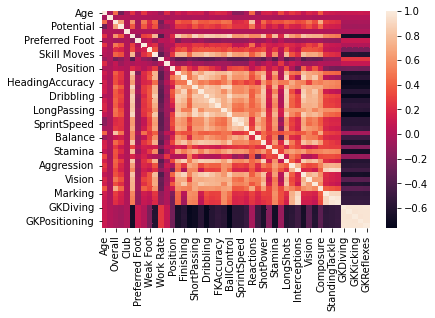

In [12]:
sns.heatmap(fifa.corr())

In [11]:
datos=pd.read_csv("datos.csv",sep=";")
datos

,Ranking (1) Tamaño 2021,Ranking(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVOGE,Nombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas Naturales (a),Personas Extranjeras (b),...,Impuesto Causado ISD 2020,Impuesto Causa ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo (6) 2020,Total Activo(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio (7) 2019,Total Recaudado (8) 2020,Total Recaudado (8) 2019
0,1,1,0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2,0,3,1,...,7653368.98,221893.35,3509949,3577970,18949015666,17928760492,3688293052,3699748891,588975950,667872172
1,2,2,0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45,42,17,19,...,49561655.93,4339679.14,796827,945874,6417335168,6436090837,1878733441,1955377497,127087663,190328750
2,3,3,0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4,5,20,3,...,21725468.25,1617777.87,0,0,3448646302,3343835273,2427005282,2314556018,144524011,139310219
3,4,5,1,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2,0,9,0,...,1399735.47,86918.43,4785739,5678838,6014463154,5334073117,784042300,791999072,206200661,234359513
4,5,4,-1,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8,0,0,0,...,21537744.27,237591.28,0,0,3286786210,3616608480,2426480097,2305837270,202204211,152342627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,283,-15,X,PRACTIPOWER (DISTRIBLU),SI,0,0,1,1,...,2205.90,0.00,0,0,5745528,8628450,610145,732912,342714,772437
298,299,285,-14,NaN,COMERCIALIZADORA INTERNACIONAL CIECOPALMA (EXT...,SI,0,0,2,0,...,27722.39,1792.76,0,0,35588799,38409409,-7100702,-5790622,28675,228358
299,300,294,-6,X,"EXORBAN (EXPORTMARSA, CLUB DEPORTIVO ESPECIALI...",SI,0,0,2,0,...,1257.60,0.00,0,0,5648737,6120840,1022284,1082467,262281,440767
300,301,301,0,NaN,"CONSULTORA TECNAZUL (AZULEC, CATERPREMIER, COM...",SI,0,0,1,0,...,0.00,0.00,0,0,14085320,35019077,9896548,18250761,277990,508853


In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 39 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Ranking (1) Tamaño  2021                                                                                      302 non-null    int64  
 1   Ranking(1) Tamaño  2020                                                                                       302 non-null    int64  
 2   Variación Ranking Tamaño 2020 - 2021                                                                          302 non-null    int64  
 3   NUEVOGE                                                                                                       49 non-null     object 
 4   Nombre Grupo Económico                                  

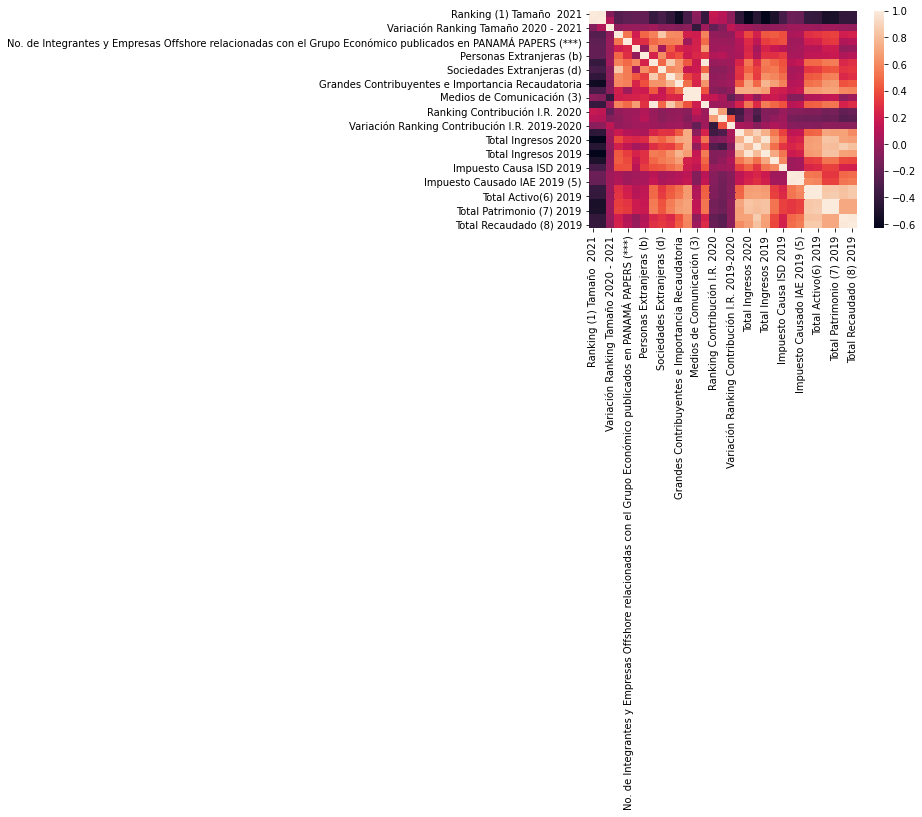

In [14]:
sns.heatmap(datos.corr())

# Conclusiones y Recomendaciones
Los datos recolectados incluyen valores que no representan una fuente de informacion importante. Esto repercute en el preprocesamiento que se debe hacer anterior a la descripcion del dataset.
Para una descripcion acertada del dataset es necesario obtener valores numericos especialmente para los valores de correlacion y otros valores estadisticos
Hay herramientas  en torno a Python para el análisis y preprocesamiento (sklearn)de  un dataset. Estas herramientas son de utilidad muy alta para comprender y describir el dataset.